# 两层Relu模拟函数

## 函数和模型

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def target_function(x):
    return x**3-2*x**2+3*x-1000

class SimpleNN(nn.Module):
    def __init__(self, hidden_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) # 使用relu作为全连接层1的激活函数
        x = self.fc2(x)
        return x

## 数据准备

In [107]:
# 数据集构造
np.random.seed(42)
x = np.random.uniform(-10, 10, size=2000)
y = target_function(x)
x = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 数据集分割
train_size = int(0.7 * len(x))
val_size = int(0.15 * len(x))
test_size = len(x) - train_size - val_size
x_train, y_train = x[:train_size], y[:train_size]
x_val, y_val = x[train_size:train_size+val_size], y[train_size:train_size+val_size]
x_test, y_test = x[train_size+val_size:], y[train_size+val_size:]

## 训练

In [112]:
# 超参数
epochs = 5000
hidden_dim = 1000

# 模型定义
model = SimpleNN(hidden_dim)
# 损失函数
criterion = nn.MSELoss()
# 优化器
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练过程
for epoch in range(epochs):
    # 前向传播 
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 132599.3750
Epoch [200/5000], Loss: 27043.7773
Epoch [300/5000], Loss: 13147.1348
Epoch [400/5000], Loss: 8944.3594
Epoch [500/5000], Loss: 6691.1255
Epoch [600/5000], Loss: 5116.2017
Epoch [700/5000], Loss: 4007.4238
Epoch [800/5000], Loss: 3318.8757
Epoch [900/5000], Loss: 2775.3350
Epoch [1000/5000], Loss: 2333.7507
Epoch [1100/5000], Loss: 1989.7316
Epoch [1200/5000], Loss: 1709.9514
Epoch [1300/5000], Loss: 1465.2487
Epoch [1400/5000], Loss: 1249.3662
Epoch [1500/5000], Loss: 1067.5811
Epoch [1600/5000], Loss: 917.4064
Epoch [1700/5000], Loss: 789.9842
Epoch [1800/5000], Loss: 679.3895
Epoch [1900/5000], Loss: 583.1114
Epoch [2000/5000], Loss: 499.5042
Epoch [2100/5000], Loss: 427.7755
Epoch [2200/5000], Loss: 367.3437
Epoch [2300/5000], Loss: 316.7729
Epoch [2400/5000], Loss: 274.0202
Epoch [2500/5000], Loss: 237.5633
Epoch [2600/5000], Loss: 206.3150
Epoch [2700/5000], Loss: 179.5153
Epoch [2800/5000], Loss: 156.4181
Epoch [2900/5000], Loss: 136.4715
Epoc

## 评估

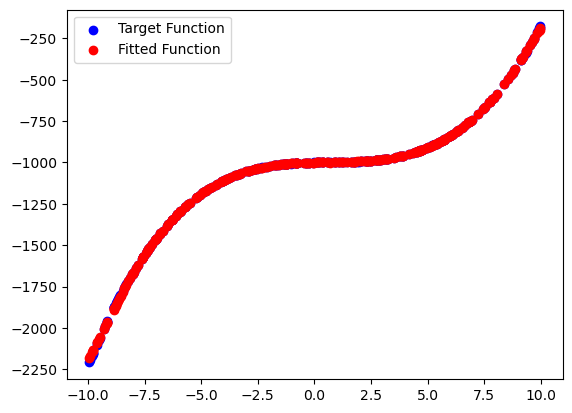

In [113]:
# 评估模式
model.eval() 
with torch.no_grad():  
    y_test_pred = model(x_test).detach().numpy()

# 拟合效果图绘制
plt.scatter(x_test.numpy(), y_test, color='blue', label='Target Function')
plt.scatter(x_test.numpy(), y_test_pred,  color='red', label='Fitted Function')
plt.legend()
plt.show()